# Coin - estimation of probability

**NAME(S):** 

Let us denote:
- $n \in \mathbb{N}_0$ number of coin flips
- $X=k \in \{0,\ldots, n\}$ number of heads
- $\pi \in [0, 1]$ probability of head

We shall use the binomial model
$$
X=k|\pi, n \sim \text{binom}(n,\pi) \qquad\text{with probability} \qquad
f(X=k|\pi, n) = \binom{n}{k}\pi^k (1-\pi)^{n-k}.
$$

As the prior distribution for $\pi$ we choose the beta distribution,
$$
\pi \sim \beta(a_0, b_0) \qquad \text{with density} \qquad
p(\pi|a_0, b_0) = \frac{1}{B(a_0, b_0)} \pi^{a_0-1} (1-\pi)^{b_0-1}. 
$$

### Task 1 (theory)
Using the Bayes' theorem, derive the posterior distribution (and posterior hyperparameters). Recall that

$$
\begin{aligned}
p(\pi|a_1, b_1) 
&\propto p(\pi|a_0, b_0, n, X=k) \\
&\propto f(X=k|\pi, n) p(\pi|a_0, b_0) \\
&= p(\pi|a_1, b_1), \qquad \text{where $a_1 = a_0+k,\quad b_1 = b_0+n-k$.}
\end{aligned}
$$

and that the normalization constants may be ignored.

### Task 2 (coding)
Given $n, a_0, b_0$ and data $x$. Write the code of the Bayesian update of the prior hyperparameters $a_0, b_0$ to $a_1, b_1$.

In [3]:
import numpy as np
from scipy.stats import beta, binom
np.random.seed(123)
pi = 0.4                             # We will estimate this number

n = 100                              ### number of flips
a0 = 1                               ### prior hyperparameter a0
b0 = 1                               ### prior hyperparameter b0

x = binom.rvs(n=n, p=pi)
print(f'Number of flips: {n}, number of heads: X={x}')
print(f'Prior: beta({a0:.1f}, {b0:.1f})')

#---------------------------------------------
# Your code comes here
a1 = 
b1 = 
# Calculate the posterior hyperparameters a1, b1
#---------------------------------------------

print(f'Posterior: beta({a1:.1f}, {b1:.1f})')

Number of flips: 100, number of heads: X=43
Prior: beta(1.0, 1.0)
Posterior: beta(44.0, 58.0)


## Estimation of $\pi$
From the lecture we know that $\beta(a, b)$ has the mean and variance
$$
\mathbb{E}[\pi] = \mathbb{E}[\pi|a,b] = \frac{a}{a+b},
\qquad\text{a}\qquad
\text{var}\pi = \frac{a b}{(a + b)^2(a+b+1)}.
$$

### Task 3 (coding)
Write a code for estimation of $\pi$ as the mean value of the distribution. Calculate the variance.

In [7]:
#---------------------------------------------
# Your code
e_pi = 
var_pi = 
#---------------------------------------------

print(f'Posterior estimate: E[pi] = {e_pi:.2f}, with var(pi) = {var_pi:.6f}')

Posterior estimate: E[pi] = 0.43, with var(pi) = 0.002381


### Task 4 (code)

Below you obtain a plot of the prior density. Add the plot of the posterior density.

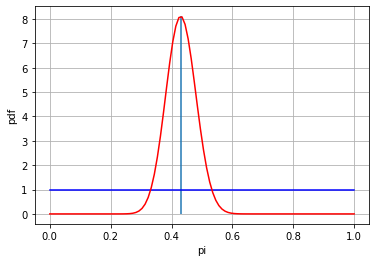

In [11]:
import matplotlib.pylab as plt

x_vals = np.linspace(start=1e-5, stop=1, num=100)    # points on x-axis
y_vals_prior = beta.pdf(x_vals, a=1, b=1)          # values of prior pdf
plt.plot(x_vals, y_vals_prior, color='blue')
plt.xlabel('pi')

#---------------------------------------------
# calculate pdf values for x_vals
y_vals_posterior = beta.pdf(***)   # use documentation

# - plot the posterior density in red
plt.plot(***, ***, color='red')

# - insert a vertical line in the mean value e_pi from 0 to the density function (plt.vlines)
plt.vlines(***)
#---------------------------------------------
plt.xlabel('pi')
plt.ylabel('pdf value')
plt.show()

### Task 5 (code)
Try to write a code that plots several pdfs depicting sequential Bayesian update with a bunch of several observations. It's up to you whether you use the Bernoulli or the binomial distribution. You're free to choose your parameters ($n, k$ and the probability). The goal is to demonstrate that the estimates converge towards the true value of head probability.

The inspiration is below, but your results should/could look differently.
![Beta distribution update](beta-coin.jpg)